In [ ]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from keras.models import Sequential 
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
#!unzip /content/Data_DIR_2021_m.zip

Archive:  /content/Data_DIR_2021_m.zip
   creating: Data_DIR_2021_m/__MACOSX/
  inflating: Data_DIR_2021_m/__MACOSX/._test.csv  
  inflating: Data_DIR_2021_m/__MACOSX/._test_weather.csv  
  inflating: Data_DIR_2021_m/__MACOSX/._train.csv  
  inflating: Data_DIR_2021_m/__MACOSX/._train_weather.csv  
  inflating: Data_DIR_2021_m/final_test.csv  
  inflating: Data_DIR_2021_m/final_train.csv  
  inflating: Data_DIR_2021_m/submission.csv  
  inflating: Data_DIR_2021_m/test.csv  
  inflating: Data_DIR_2021_m/test_weather.csv  
  inflating: Data_DIR_2021_m/train.csv  
  inflating: Data_DIR_2021_m/train_weather.csv  


In [ ]:
train_df = pd.read_csv('/content/Data_DIR_2021_m/train.csv')
test_df = pd.read_csv('/content/Data_DIR_2021_m/test.csv')

In [ ]:
#train_df["LAP_TIME"] = np.log1p(train_df["LAP_TIME"])

In [ ]:
#train_df.drop(train_df[(train_df['LAP_TIME']<4)].index, inplace=True)
#train_df.reset_index(drop=True, inplace=True)

In [ ]:
def time_conv(t):
  t=str(t)
  ans=0.0
  if ':' in t:
    ind = t.index(':')
    ans = float(t[:ind])*60.0 + float(t[(ind+1):])
  else:
    ans = float(t)
  return ans

In [ ]:
tc = train_df["LAP_TIME"]

In [ ]:
df = train_df.append(test_df)

In [ ]:
cn=list(df.columns)
pcl = [6,8,10,13,14,15,16,17,19]
for c in pcl:
  df[cn[c]]=df[cn[c]].apply(func=time_conv)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        10696 non-null  int64  
 1    DRIVER_NUMBER                10696 non-null  int64  
 2    LAP_NUMBER                   10696 non-null  int64  
 3   LAP_TIME                      10276 non-null  float64
 4    LAP_IMPROVEMENT              10696 non-null  int64  
 5    CROSSING_FINISH_LINE_IN_PIT  1250 non-null   object 
 6    S1                           10692 non-null  float64
 7    S1_IMPROVEMENT               10696 non-null  int64  
 8    S2                           10688 non-null  float64
 9    S2_IMPROVEMENT               10696 non-null  int64  
 10   S3                           10660 non-null  float64
 11   S3_IMPROVEMENT               10696 non-null  int64  
 12   KPH                          10664 non-null  float64
 13   EL

In [ ]:
catcols = [5,18,21,20,23,24]
for col in catcols:
  df[cn[col]]=df[cn[col]].fillna('N')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        10696 non-null  int64  
 1    DRIVER_NUMBER                10696 non-null  int64  
 2    LAP_NUMBER                   10696 non-null  int64  
 3   LAP_TIME                      10276 non-null  float64
 4    LAP_IMPROVEMENT              10696 non-null  int64  
 5    CROSSING_FINISH_LINE_IN_PIT  10696 non-null  object 
 6    S1                           10692 non-null  float64
 7    S1_IMPROVEMENT               10696 non-null  int64  
 8    S2                           10688 non-null  float64
 9    S2_IMPROVEMENT               10696 non-null  int64  
 10   S3                           10660 non-null  float64
 11   S3_IMPROVEMENT               10696 non-null  int64  
 12   KPH                          10664 non-null  float64
 13   EL

In [ ]:
#handle missing data
ncols = [3,6,8,10,12,15,16,17,19,22] #,25,26,27,28,29,30,31]
for col in ncols:
  df[cn[col]]=df[cn[col]].fillna(df[cn[col]].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        10696 non-null  int64  
 1    DRIVER_NUMBER                10696 non-null  int64  
 2    LAP_NUMBER                   10696 non-null  int64  
 3   LAP_TIME                      10696 non-null  float64
 4    LAP_IMPROVEMENT              10696 non-null  int64  
 5    CROSSING_FINISH_LINE_IN_PIT  10696 non-null  object 
 6    S1                           10696 non-null  float64
 7    S1_IMPROVEMENT               10696 non-null  int64  
 8    S2                           10696 non-null  float64
 9    S2_IMPROVEMENT               10696 non-null  int64  
 10   S3                           10696 non-null  float64
 11   S3_IMPROVEMENT               10696 non-null  int64  
 12   KPH                          10696 non-null  float64
 13   EL

In [ ]:
#get numerical cols

num_cols = []
for i in range(1,df.shape[1]):
  if i not in catcols: num_cols.append(cn[i])
print(num_cols)

[' DRIVER_NUMBER', ' LAP_NUMBER', 'LAP_TIME', ' LAP_IMPROVEMENT', ' S1', ' S1_IMPROVEMENT', ' S2', ' S2_IMPROVEMENT', ' S3', ' S3_IMPROVEMENT', ' KPH', ' ELAPSED', ' HOUR', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'PIT_TIME', 'POWER']


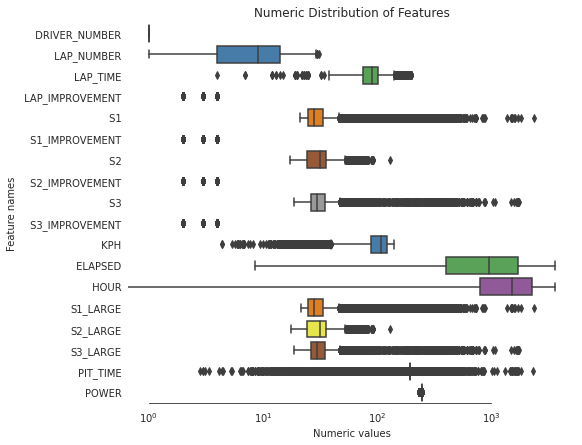

In [ ]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
# Find skewed numerical features
skew_features = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 13 numerical features with Skew > 0.5 :


S3_LARGE            11.663499
 S3                 11.663495
 S1                  8.495239
S1_LARGE             8.495219
PIT_TIME             8.363415
 S1_IMPROVEMENT      3.368257
 S3_IMPROVEMENT      3.361366
 LAP_IMPROVEMENT     3.351049
 S2_IMPROVEMENT      3.350492
 S2                  1.322420
dtype: float64

In [ ]:
# Normalize skewed features
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

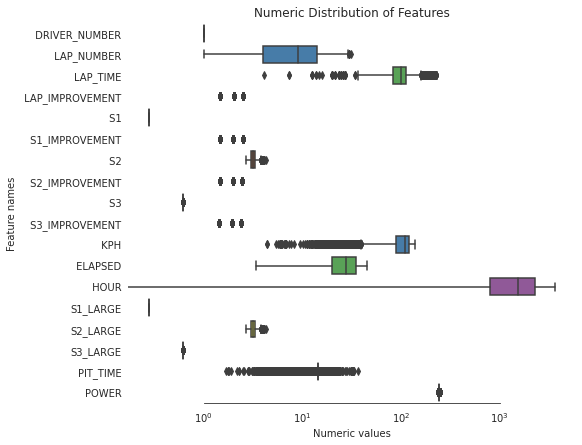

In [ ]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df[num_cols] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [ ]:
df.drop(columns=['NUMBER'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10696 entries, 0 to 419
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    DRIVER_NUMBER                10696 non-null  int64  
 1    LAP_NUMBER                   10696 non-null  int64  
 2   LAP_TIME                      10696 non-null  float64
 3    LAP_IMPROVEMENT              10696 non-null  float64
 4    CROSSING_FINISH_LINE_IN_PIT  10696 non-null  object 
 5    S1                           10696 non-null  float64
 6    S1_IMPROVEMENT               10696 non-null  float64
 7    S2                           10696 non-null  float64
 8    S2_IMPROVEMENT               10696 non-null  float64
 9    S3                           10696 non-null  float64
 10   S3_IMPROVEMENT               10696 non-null  float64
 11   KPH                          10696 non-null  float64
 12   ELAPSED                      10696 non-null  float64
 13   HO

In [ ]:
df=pd.get_dummies(df)
df.drop(columns=['LAP_TIME'],inplace=True)

In [ ]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ndf = pd.DataFrame(x_scaled)
#ndf['target']=tc

In [ ]:
X,Y,X_test = ndf.iloc[:-420,:],tc,ndf.iloc[-420:,:]
X.shape,Y.shape,X_test.shape

((10276, 86), (10276,), (420, 86))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=45)
pca.fit(X)
X=pca.transform(X)
X_test = pca.transform(X_test)
sum(pca.explained_variance_ratio_)*100

99.40944080517046

In [ ]:
def make_nn(inp,nnl=[32, 16],dr=0.0):
  nl=len(nnl)
  model = Sequential()
  model.add(Dense(nnl[0],input_dim=inp))
  model.add(Activation('relu'))
  for i in range(1,nl):
    model.add(Dense(nnl[i]))
    model.add(Activation('relu'))
    model.add(layers.Dropout(dr))
  model.add(Dense(1))
  model.add(Activation('relu'))
  return model

In [ ]:
#X_train, X_val, Y_train, Y_val = train_test_split(X,Y,  test_size = .8, shuffle = True)

In [ ]:
models = [
          make_nn(X.shape[1],[16,16,16],0.2) for _ in range(500) ]

preds_val = []
preds_test = []
batch_size = 32
c = 1
for model in models:
  X_train, X_val, Y_train, Y_val = train_test_split(X,Y,  test_size = .6, shuffle = True)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_squared_logarithmic_error)
  model.fit(X_train, Y_train, batch_size=batch_size, epochs=50,verbose=0) # validation_data= [X_val, Y_val],
  #preds_val.append(model.predict(X_val))
  preds_test.append(model.predict(X_test))
  print(f'model {c} is done ')#, val rmlse is {mean_squared_log_error(preds_val[c-1],Y_val)}')
  c=c+1

In [ ]:
# Light Gradient Boosting Regressor
'''lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=1000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)
# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=1200,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)


# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=1200,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)


# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=( lightgbm, svr, gbr, rf,xgboost),
                                meta_regressor= xgboost,
                                use_features_in_secondary=True)'''

"lightgbm = LGBMRegressor(objective='regression', \n                       num_leaves=6,\n                       learning_rate=0.01, \n                       n_estimators=1000,\n                       max_bin=200, \n                       bagging_fraction=0.8,\n                       bagging_freq=4, \n                       bagging_seed=8,\n                       feature_fraction=0.2,\n                       feature_fraction_seed=8,\n                       min_sum_hessian_in_leaf = 11,\n                       verbose=-1,\n                       random_state=42)\n# XGBoost Regressor\nxgboost = XGBRegressor(learning_rate=0.01,\n                       n_estimators=1200,\n                       max_depth=4,\n                       min_child_weight=0,\n                       gamma=0.6,\n                       subsample=0.7,\n                       colsample_bytree=0.7,\n                       objective='reg:linear',\n                       nthread=-1,\n                       scale_pos_weigh

In [ ]:
'''mlmodels = [lightgbm,xgboost,svr,gbr,rf,stack_gen]
c = 0
for model in mlmodels:
  #X_train, X_val, Y_train, Y_val = train_test_split(X,Y,  test_size = .2, shuffle = True)
  model.fit(X_train, Y_train)
  preds_val.append(model.predict(X_val))
  preds_test.append(model.predict(X_test))
  print(f'model {c} is done , val rmlse is {mean_squared_log_error(preds_val[c-1],Y_val)}')
  c=c+1'''

"mlmodels = [lightgbm,xgboost,svr,gbr,rf,stack_gen]\nc = 0\nfor model in mlmodels:\n  #X_train, X_val, Y_train, Y_val = train_test_split(X,Y,  test_size = .2, shuffle = True)\n  model.fit(X_train, Y_train)\n  preds_val.append(model.predict(X_val))\n  preds_test.append(model.predict(X_test))\n  print(f'model {c} is done , val rmlse is {mean_squared_log_error(preds_val[c-1],Y_val)}')\n  c=c+1"

In [ ]:
for i in range(len(preds_test)):
  submission_df = pd.DataFrame(preds_test[i], columns = ["LAP_TIME"])
  submission_df = submission_df.fillna(value = np.mean(submission_df))
  submission_df.to_csv('/content/Download5/my_3_16ssubmission6_file'+str(i)+'.csv', index=False)
import shutil
shutil.make_archive('Download5', 'zip', '/content/Download5/')

'/content/Download5.zip'

In [ ]:
'''from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
#svr_model_full_data = svr.fit(np.array(X_train), np.array(Y_train))
#mean_squared_log_error(svr.predict(X_val),Y_val)
regr = BaggingRegressor(base_estimator=svr,
                        n_estimators=10, random_state=0).fit(X_train, Y_train)
mean_squared_log_error(regr.predict(X_val),Y_val)'''

'from sklearn.svm import SVR\nfrom sklearn.ensemble import BaggingRegressor\nsvr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))\n#svr_model_full_data = svr.fit(np.array(X_train), np.array(Y_train))\n#mean_squared_log_error(svr.predict(X_val),Y_val)\nregr = BaggingRegressor(base_estimator=svr,\n                        n_estimators=10, random_state=0).fit(X_train, Y_train)\nmean_squared_log_error(regr.predict(X_val),Y_val)'

In [ ]:
'''stacked_val = np.column_stack(tuple(preds_val))
stacked_test = np.column_stack(tuple(preds_test))
meta_model = make_nn(len(models),[32,16],0.1)
meta_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_squared_logarithmic_error)
meta_model.fit(stacked_val, Y_val,validation_split=0.1, batch_size=batch_size, epochs=20)
ans=meta_model.predict(stacked_test)'''

'stacked_val = np.column_stack(tuple(preds_val))\nstacked_test = np.column_stack(tuple(preds_test))\nmeta_model = make_nn(len(models),[32,16],0.1)\nmeta_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-3),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_squared_logarithmic_error)\nmeta_model.fit(stacked_val, Y_val,validation_split=0.1, batch_size=batch_size, epochs=20)\nans=meta_model.predict(stacked_test)'

In [ ]:
'''nsets = len(models)//10
stacked_val,stacked_test,meta_model,predsl1,vall1=[],[],[],[],[]
for s in range(0,nsets):
  stacked_val.append(np.column_stack(tuple(preds_val[(s*10):(s*10+10)])))
  stacked_test.append(np.column_stack(tuple(preds_test[(s*10):(s*10+10)])))
  meta_model.append(make_nn(10,[32,16],0.1))
  meta_model[s].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_squared_logarithmic_error)
  meta_model[s].fit(stacked_val[s], Y_val,validation_split=0.1, batch_size=batch_size, epochs=40)
  predsl1.append(meta_model[s].predict(stacked_test[s]))
  vall1.append(meta_model[s].predict(stacked_test[s]))
s_val = np.column_stack(tuple(vall1))
s_test = np.column_stack(tuple(predsl1))
meta_model = make_nn(nsets,[32,16],0.1)
meta_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_squared_logarithmic_error)
meta_model.fit(s_val, Y_val,validation_split=0.1, batch_size=batch_size, epochs=40)'''

'nsets = len(models)//10\nstacked_val,stacked_test,meta_model,predsl1,vall1=[],[],[],[],[]\nfor s in range(0,nsets):\n  stacked_val.append(np.column_stack(tuple(preds_val[(s*10):(s*10+10)])))\n  stacked_test.append(np.column_stack(tuple(preds_test[(s*10):(s*10+10)])))\n  meta_model.append(make_nn(10,[32,16],0.1))\n  meta_model[s].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_squared_logarithmic_error)\n  meta_model[s].fit(stacked_val[s], Y_val,validation_split=0.1, batch_size=batch_size, epochs=40)\n  predsl1.append(meta_model[s].predict(stacked_test[s]))\n  vall1.append(meta_model[s].predict(stacked_test[s]))\ns_val = np.column_stack(tuple(vall1))\ns_test = np.column_stack(tuple(predsl1))\nmeta_model = make_nn(nsets,[32,16],0.1)\nmeta_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),loss = tf.keras.losses.mean_squared_logarithmic_error, metrics=tf.keras.losses.mean_

In [ ]:
#ans = sum(predsl1)/len(predsl1)

In [ ]:
'''stacked_val = np.column_stack(tuple(preds_val))
stacked_test = np.column_stack(tuple(preds_test))
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))
svr.fit(stacked_val,Y_val)'''

'stacked_val = np.column_stack(tuple(preds_val))\nstacked_test = np.column_stack(tuple(preds_test))\nsvr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))\nsvr.fit(stacked_val,Y_val)'

In [ ]:
#submission_df = pd.DataFrame(model.predict(X_test), columns = ["LAP_TIME"])
#submission_df = pd.DataFrame(meta_model.predict(stacked_test), columns = ["LAP_TIME"])
submission_df = pd.DataFrame(preds_test[0], columns = ["LAP_TIME"])
#submission_df = pd.DataFrame(svr.predict(stacked_test), columns = ["LAP_TIME"])
submission_df = submission_df.fillna(value = np.mean(submission_df))
submission_df.to_csv('my_submission_file.csv', index=False)
from google.colab import files
files.download('my_submission_file.csv')
print(submission_df.size)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

420
